In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1]:
TARGET_COLUMN = "PRB_FOR_EXPANSION"
COLUMNS = ['PRB_UTILIZATION', 'RRC_USER', 'PAYLOAD', 'PRB_FOR_EXPANSION']

In [4]:
df = pd.read_csv("data.csv", usecols=COLUMNS, encoding='latin-1')
print(df.head())
print(df.info())
print(df.describe())

   PRB_UTILIZATION  PRB_FOR_EXPANSION   RRC_USER     PAYLOAD
0         0.788342                  0   40.56900   5578.5300
1         0.996347                  1  189.60725  12526.7775
2         0.866482                  0   56.71725   6454.2875
3         0.575340                  0   49.06525   6588.3050
4         0.989565                  1  160.48700   7454.7550
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238397 entries, 0 to 238396
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PRB_UTILIZATION    90000 non-null   float64
 1   PRB_FOR_EXPANSION  238397 non-null  int64  
 2   RRC_USER           89227 non-null   float64
 3   PAYLOAD            89155 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 7.3 MB
None
       PRB_UTILIZATION  PRB_FOR_EXPANSION      RRC_USER       PAYLOAD
count     90000.000000      238397.000000  89227.000000  89155.000000
mean          0.600921           0.

In [5]:
df = df.dropna()
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]
df.head()

,PRB_UTILIZATION,PRB_FOR_EXPANSION,RRC_USER,PAYLOAD
0,0.788342,0,40.56900,5578.5300
1,0.996347,1,189.60725,12526.7775
2,0.866482,0,56.71725,6454.2875
3,0.575340,0,49.06525,6588.3050
4,0.989565,1,160.48700,7454.7550


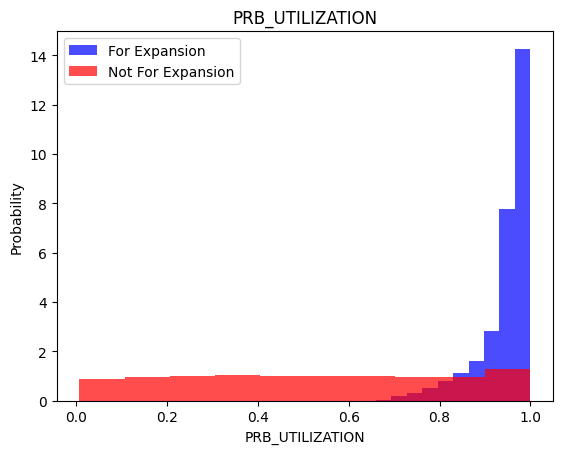

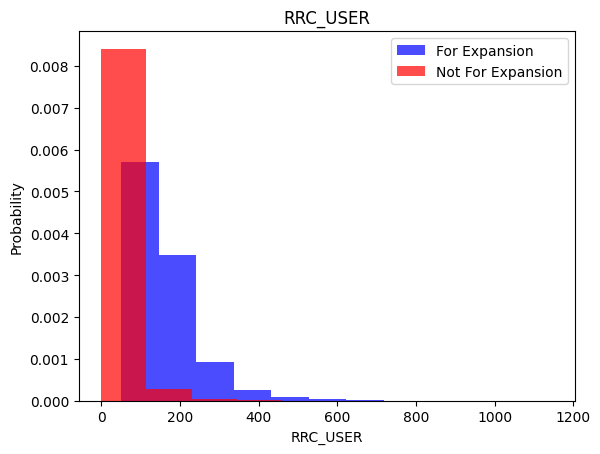

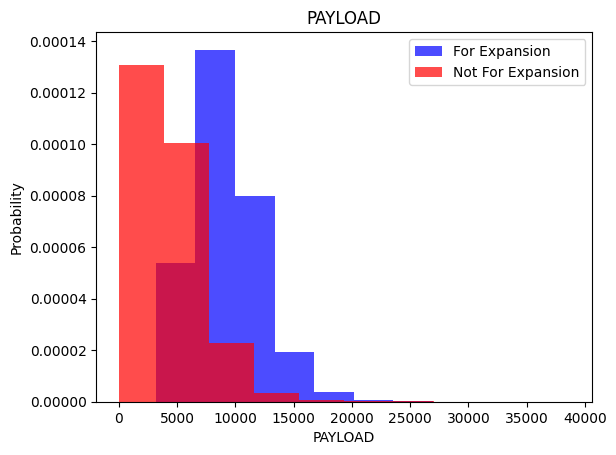

In [10]:
for label in df.columns:
  if (label == TARGET_COLUMN):
    continue
  plt.hist(df[df[TARGET_COLUMN] == 1][label], color="blue", label="For Expansion", alpha=0.7, density=True)
  plt.hist(df[df[TARGET_COLUMN] == 0][label], color="red", label="Not For Expansion", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [11]:
def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [14]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [19]:
log_reg = LogisticRegression()

In [20]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
y_pred_log_reg = log_reg.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14147
           1       0.83      0.77      0.80      3684

    accuracy                           0.92     17831
   macro avg       0.89      0.87      0.88     17831
weighted avg       0.92      0.92      0.92     17831



In [26]:
def plot_confusion_matrix(cm):
  sns.heatmap(cm, annot=True, fmt='d')
  plt.xlabel('Predicted')
  plt.ylabel('Truth')

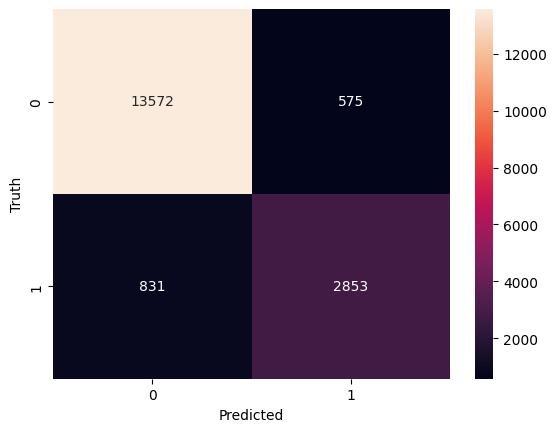

In [31]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plot_confusion_matrix(cm_log_reg)

# Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred_nb = nb_model.predict(X_test)

In [35]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93     14147
           1       0.70      0.88      0.78      3684

    accuracy                           0.90     17831
   macro avg       0.83      0.89      0.86     17831
weighted avg       0.91      0.90      0.90     17831



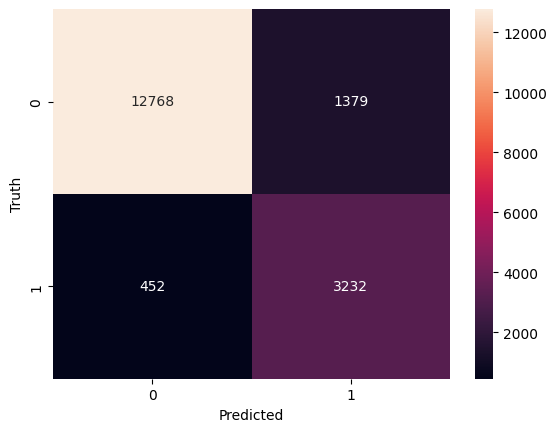

In [36]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(cm_nb)

# Support Vector Machines

In [37]:
from sklearn.svm import SVC

In [38]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [39]:
y_pred_svm = svm_model.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     14147
           1       0.85      0.66      0.74      3684

    accuracy                           0.91     17831
   macro avg       0.88      0.81      0.84     17831
weighted avg       0.90      0.91      0.90     17831



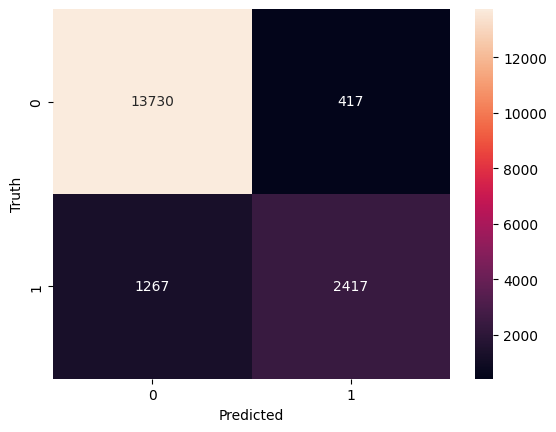

In [41]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm)

# Neural Network

In [42]:
import tensorflow as tf

In [58]:
def train_model(X_train, y_train, nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(nodes, activation="relu"),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation="sigmoid"),
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1
  )

  return nn_model, history

In [44]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [61]:
nn_model, history = train_model(X_train, y_train, 64, 0.2, 0.001, 128, 100)

Epoch 1/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6089 - loss: 58.3544 - val_accuracy: 0.8012 - val_loss: 0.5862
Epoch 2/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7863 - loss: 0.8190 - val_accuracy: 0.8012 - val_loss: 0.5310
Epoch 3/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.5861 - val_accuracy: 0.8012 - val_loss: 0.4992
Epoch 4/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8023 - loss: 0.5370 - val_accuracy: 0.8005 - val_loss: 0.4629
Epoch 5/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8045 - loss: 0.4847 - val_accuracy: 0.8008 - val_loss: 0.4531
Epoch 6/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8080 - loss: 0.4750 - val_accuracy: 0.8006 - val_loss: 0.4349
Epoch 7/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.4626 - val_accuracy: 0.8005 - val_loss: 0.4284
Epoch 8/100
446/446 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8172 - loss: 0.4434 - val_acc

In [63]:
nn_model.evaluate(X_test, y_test)

558/558 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8828 - loss: 0.2302


[0.2284737080335617, 0.8820593357086182]

In [64]:
y_pred_nn = nn_model.predict(X_test)

558/558 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


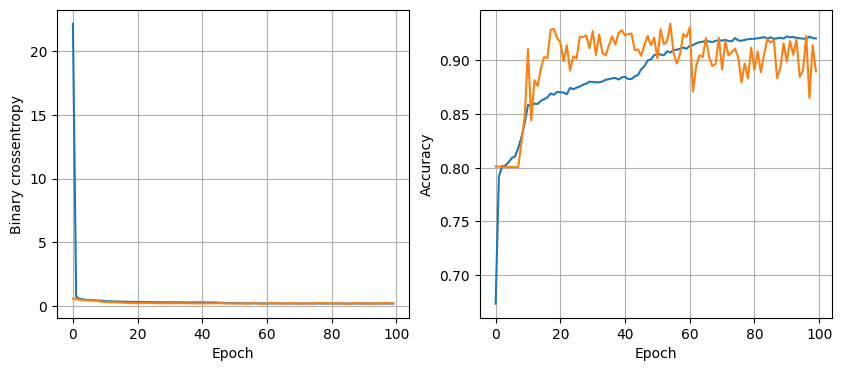

In [67]:
plot_history(history)

Logistic Regression model has the highest accuracy of 92%.